# 日本のCOVID19感染者数分析(情報提供:NHK) 観察用

In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")

In [3]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
latest_date_str = pref["日付"].max().strftime("%Y/%m/%d")

In [5]:
all_jp = pref.copy().groupby(["日付"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]

In [6]:
all_jp["weekday"] = all_jp["日付"].dt.weekday
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp = pd.merge(all_jp, weekdays, left_on="weekday", right_index=True, how="left")

## 移動平均

In [7]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp["死者数移動平均7"] = all_jp["各地の死者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日,感染者数移動平均7,死者数移動平均7
565,2021-08-03,12001,10,1,火,10550.000000,9.428571
566,2021-08-04,14199,14,2,水,11212.000000,10.285714
567,2021-08-05,15247,8,3,木,11863.428571,9.428571
568,2021-08-06,15627,20,4,金,12563.428571,11.000000
569,2021-08-07,15743,14,5,土,13051.571429,11.714286


## 増減速度

In [8]:
all_jp["感染者数移動平均7増減"] = all_jp["感染者数移動平均7"].diff()
all_jp["死者数移動平均7増減"] = all_jp["死者数移動平均7"].diff()
all_jp.tail(7)

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日,感染者数移動平均7,死者数移動平均7,感染者数移動平均7増減,死者数移動平均7増減
563,2021-08-01,10159,5,6,日,9391.428571,9.857143,736.142857,0.142857
564,2021-08-02,8385,11,0,月,9923.857143,9.714286,532.428571,-0.142857
565,2021-08-03,12001,10,1,火,10550.000000,9.428571,626.142857,-0.285714
566,2021-08-04,14199,14,2,水,11212.000000,10.285714,662.000000,0.857143
567,2021-08-05,15247,8,3,木,11863.428571,9.428571,651.428571,-0.857143
568,2021-08-06,15627,20,4,金,12563.428571,11.000000,700.000000,1.571429
569,2021-08-07,15743,14,5,土,13051.571429,11.714286,488.142857,0.714286


### 感染者数前週同曜日比

In [9]:
import datetime
all_jp["新規感染者数先週比"] = all_jp["各地の感染者数_1日ごとの発表数"].pct_change(periods=7)
all_jp["死者数先週比"] = all_jp["各地の死者数_1日ごとの発表数"].pct_change(periods=7)
all_jp["新規感染者数先週差"] = all_jp["各地の感染者数_1日ごとの発表数"].diff(periods=7)
all_jp["死者数先週差"] = all_jp["各地の死者数_1日ごとの発表数"].diff(periods=7)


## 重症者数

In [10]:
severe = pd.read_csv("COVID-19-jp/severe_cases_daily.csv")
severe["Date"] = pd.to_datetime(severe["Date"])
severe = severe[severe.Prefecture=="ALL"]
severe.tail()

,Date,Prefecture,Severe cases
21600,2021-08-02,ALL,754
21648,2021-08-03,ALL,777
21696,2021-08-04,ALL,823
21744,2021-08-05,ALL,1020
21792,2021-08-06,ALL,1068


In [11]:
print(severe.count())
print(all_jp.count())

Date            455
Prefecture      455
Severe cases    455
dtype: int64
日付                  570
各地の感染者数_1日ごとの発表数    570
各地の死者数_1日ごとの発表数     570
weekday             570
曜日                  570
感染者数移動平均7           564
死者数移動平均7            564
感染者数移動平均7増減         563
死者数移動平均7増減          563
新規感染者数先週比           558
死者数先週比              517
新規感染者数先週差           563
死者数先週差              563
dtype: int64


## 曜日別陽性者集計

In [12]:
all_jp_week_mean = all_jp.groupby(["weekday"],as_index=False).mean()[["各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数"]].sort_index()
all_jp_week_mean = pd.merge(all_jp_week_mean, weekdays, left_index=True, right_index=True, how="left")
all_jp_week_mean

,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,曜日
0,1178.518519,24.765432,月
1,1648.160494,32.419753,火
2,1951.395062,31.172840,水
3,2045.792683,28.304878,木
4,1989.695122,29.646341,金
5,2054.207317,23.853659,土
6,1576.716049,17.333333,日


In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


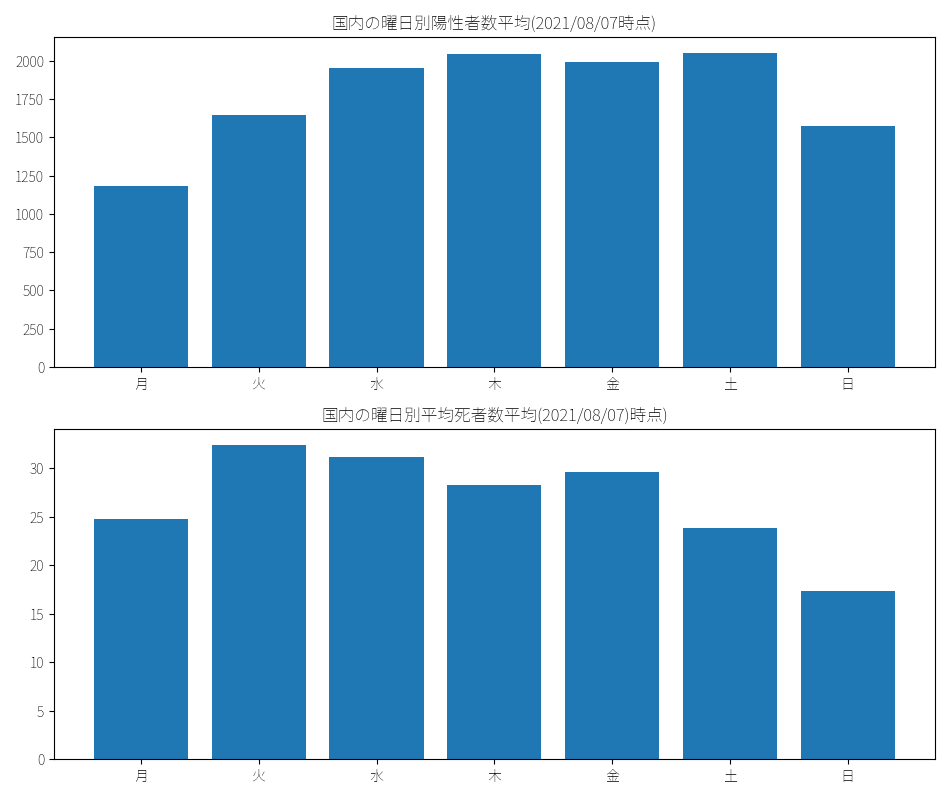

<BarContainer object of 7 artists>

In [16]:
fig=plt.figure(figsize=(9.5,8),tight_layout=True)
plt.subplot(2,1,1) # (rows, columns, panel number)
#fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)
#wp_ax = ax[0]
plt.title("国内の曜日別陽性者数平均({}時点)".format(latest_date_str))
plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の感染者数_1日ごとの発表数"])
#wd_ax = ax[1]
plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("国内の曜日別平均死者数平均({})時点)".format(latest_date_str))
plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の死者数_1日ごとの発表数"])

## 2021-１〜６月の死者数

In [21]:
all_jp_2021_1st_half = all_jp.loc[(all_jp["日付"]>=pd.to_datetime("2021-01-01")) & (all_jp["日付"]<=pd.to_datetime("2021-06-30"))]["各地の死者数_1日ごとの発表数"]

In [25]:
print("日数:{}".format(all_jp_2021_1st_half.count()))
print("死者数:{}".format(all_jp_2021_1st_half.sum()))
print("1日あたり死者数:{}".format(all_jp_2021_1st_half.sum()/all_jp_2021_1st_half.count())

日数:181
死者数:11288
1日あたり死者数:62.3646408839779


## 2021-7以降の死者数

In [28]:
all_jp_after202107 = all_jp.loc[all_jp["日付"]>=pd.to_datetime("2021-07-01")]["各地の死者数_1日ごとの発表数"]

In [30]:
print("日数:{}".format(all_jp_after202107.count()))
print("死者数:{}".format(all_jp_after202107.sum()))
print("1日あたり死者数:{}".format(all_jp_after202107.sum()/all_jp_after202107.count()))

日数:38
死者数:490
1日あたり死者数:12.894736842105264
